**Проект: Статистический анализ данных популярного сервиса аренды самокатов GoFast**

**Введение**

В последние годы сервис аренды самокатов GoFast значительно расширил свою аудиторию, и для дальнейшего роста компании важно понять поведение пользователей и выявить возможности для оптимизации бизнес-процессов. В рамках данного исследования мы проведем статистический анализ данных о пользователях и их поездках, чтобы проверить ключевые гипотезы, которые могут способствовать улучшению сервиса.

*Цель работы*

Целью данного проекта является проведение глубокого анализа данных, предоставленных сервисом GoFast, с целью выявления закономерностей в поведении пользователей и проверки гипотез о влиянии различных факторов на доходность и частоту использования сервиса.

*План работы*

1. Загрузка данных:

Импорт данных из CSV-файлов с помощью библиотеки pandas и предварительный просмотр каждого датафрейма.

2. Предобработка данных:

Приведение типов данных и проверка на наличие пропущенных значений и дубликатов.

3. Исследовательский анализ данных:

Визуализация информации о пользователях и поездках, включая частоту городов, соотношение подписчиков и пользователей без подписки, возраст пользователей, расстояние и продолжительность поездок.

4. Объединение данных:

Объединение информации о пользователях, поездках и подписках для более глубокого анализа, а также создание отдельных датафреймов для каждой категории пользователей.

5. Подсчет выручки:

Подсчет помесячной выручки на основе данных о поездках и условиях подписки, включая агрегацию данных.

6. Проверка гипотез:

Проверка гипотез о продолжительности поездок и расстоянии, а также анализ выручки от подписчиков и пользователей без подписки.

7. Дополнительный анализ:

Исследование возможности раздачи промокодов для увеличения числа подписчиков и оценка вероятности открытия уведомлений клиентами с использованием биномиального распределения и его нормальной аппроксимации.

*Описание данных*

Для анализа используются три основных набора данных:

1. Пользователи — `users_go.csv`:
   - `user_id`: уникальный идентификатор пользователя.
   - `name`: имя пользователя.
   - `age`: возраст пользователя.
   - `city`: город проживания.
   - `subscription_type`: тип подписки (free, ultra).

2. Поездки — `rides_go.csv`:
   - `user_id`: уникальный идентификатор пользователя.
   - `distance`: расстояние, проходимое пользователем за одну поездку (в метрах).
   - `duration`: продолжительность поездки (в минутах).
   - `date`: дата поездки.

3. Подписки — `subscriptions_go.csv`:
   - `subscription_type`: тип подписки.
   - `minute_price`: стоимость одной минуты поездки для данной подписки.
   - `start_ride_price`: стоимость начала поездки.
   - `subscription_fee`: ежемесячная стоимость подписки.

Данное исследование направлено на улучшение понимания поведения пользователей, выявление ключевых факторов, способствующих их выбору, и предоставление обоснованных рекомендаций для повышения эффективности работы сервиса GoFast.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from math import factorial, exp
from math import sqrt
from scipy.stats import binom, norm
from scipy import stats as st
import seaborn as sns
import warnings
import numpy as np

# Игнорирование предупреждений
warnings.filterwarnings('ignore')

#### Шаг 1. Загрузка данных

Откроем файл с данными и изучим общую информацию:

In [2]:
users = pd.read_csv('/datasets/users_go.csv')

In [3]:
rides = pd.read_csv('/datasets/rides_go.csv')

In [4]:
subscriptions = pd.read_csv('/datasets/subscriptions_go.csv')

In [5]:
rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


In [6]:
rides.head()

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28


In [7]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


In [8]:
users.head()

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra


In [9]:
subscriptions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


In [10]:
subscriptions.head()

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


На основе предоставленных данных можно сделать несколько ключевых выводов о каждом из трех датафреймов.

**1. Датафрейм с поездками (rides_go.csv)**

Общее количество записей: 18068

Столбцы:

- user_id: Уникальный идентификатор пользователя (целочисленный тип, не содержит пропусков).
- distance: Расстояние, проходимое пользователем за одну поездку (числовой тип, не содержит пропусков).
- duration: Длительность поездки в минутах (числовой тип, не содержит пропусков).
- date: Дата совершения поездки (строковый тип, не содержит пропусков, требует преобразования в тип datetime).

Данные о поездках содержат значительное количество записей, что может обеспечить надежную выборку для анализа.
Необходимо преобразовать столбец date в формат даты для дальнейшего анализа.
Отсутствие пропусков в данных позволяет уверенно проводить анализ без предварительной обработки.


**2. Датафрейм с пользователями (users_go.csv)**

Общее количество записей: 1565

Столбцы:

- user_id: Уникальный идентификатор пользователя (целочисленный тип, не содержит пропусков).
- name: Имя пользователя (строковый тип, не содержит пропусков).
- age: Возраст пользователя (целочисленный тип, не содержит пропусков).
- city: Город пользователя (строковый тип, не содержит пропусков).
- subscription_type: Тип подписки пользователя (строковый тип, не содержит пропусков).

Размер выборки пользователей позволяет проводить анализ, однако количество записей значительно меньше, чем количество записей о поездках.
Необходимо изучить распределение возрастов пользователей и типы подписок, чтобы понять предпочтения клиентов и разработать соответствующие стратегии.

**3. Датафрейм с подписками (subscriptions_go.csv)**

Общее количество записей: 2

Столбцы:

- subscription_type: Тип подписки (строковый тип, содержит только 2 уникальных значения).
- minute_price: Стоимость одной минуты поездки (целочисленный тип, не содержит пропусков).
- start_ride_price: Стоимость начала поездки (целочисленный тип, не содержит пропусков).
- subscription_fee: Ежемесячная плата за подписку (целочисленный тип, не содержит пропусков).


**Общие выводы:**
Необходимо учесть условия использования каждой подписки для оценки потенциальной выручки и расходов компании.
В целом, данные содержат необходимую информацию для выполнения статистического анализа, проверки гипотез и формирования выводов о пользователях и их поездках. Необходимо произвести дальнейшую предобработку и анализ, чтобы выявить полезные закономерности, которые могут помочь в принятии бизнес-решений для сервиса аренды самокатов GoFast.

#### Шаг 2. Предобработка данных

Преобразуем столбец date в формат даты для дальнейшего анализа:

In [11]:
rides['date'] = pd.to_datetime(rides['date'], format='%Y-%m-%d')
rides.head()

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28


Проверим, что тип даты изменился на datetime:

In [12]:
rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  int64         
 1   distance  18068 non-null  float64       
 2   duration  18068 non-null  float64       
 3   date      18068 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 564.8 KB


Необходимо извлечь месяц из столбца с датами поездок и создать новый столбец для упрощения последующего анализа. Это позволит более удобно группировать данные по месяцам и проводить анализ динамики поездок.

In [13]:
rides['month'] = rides['date'].dt.month
rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  int64         
 1   distance  18068 non-null  float64       
 2   duration  18068 non-null  float64       
 3   date      18068 non-null  datetime64[ns]
 4   month     18068 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2)
memory usage: 705.9 KB


Дополнительно проверим данные за какой период у нас имеются, чтобы в дальнейшем не допустить ошибок при группировке по месяцам:

In [14]:
print('Данные о поездках представлены за период:', rides['date'].dt.date.min(),'--', rides['date'].dt.date.max())

Данные о поездках представлены за период: 2021-01-01 -- 2021-12-30


Теперь нам необходимо осуществить проверку данных на наличие дубликатов и пропущенных значений в таблицах пользователей, поездок и подписок. С помощью методов `duplicated()` и `isna()` мы определяем количество дублирующих записей и отсутствующих значений. Этот анализ важен для оценки качества данных и выявления потенциальных проблем, которые могут повлиять на дальнейший статистический анализ и интерпретацию результатов. Выявление дубликатов и пропусков позволит нам провести необходимую предобработку и обеспечить корректность дальнейших расчетов.

In [15]:
print('Количество дубликатов в таблице users:', users.duplicated().sum())
print(f'Количество пропусков в таблице users:\n{users.isna().sum()}\n')
print('Количество дубликатов в таблице rides:', rides.duplicated().sum())
print(f'Количество пропусков в таблице rides:\n{rides.isna().sum()}\n')
print('Количество дубликатов в таблице subscriptions:', subscriptions.duplicated().sum())
print(f'Количество пропусков в таблице subscriptions:\n{subscriptions.isna().sum()}')

Количество дубликатов в таблице users: 31
Количество пропусков в таблице users:
user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64

Количество дубликатов в таблице rides: 0
Количество пропусков в таблице rides:
user_id     0
distance    0
duration    0
date        0
month       0
dtype: int64

Количество дубликатов в таблице subscriptions: 0
Количество пропусков в таблице subscriptions:
subscription_type    0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64


Теперь мы проанализировали результаты проверки на дубликаты и пропуски в таблицах. В таблице **users** было найдено 31 дубликат, но отсутствуют пропущенные значения в всех столбцах. Это указывает на необходимость очистки данных, чтобы избежать повторного учета пользователей в последующих анализах.

В таблице **rides** не выявлено дубликатов, и все значения также заполнены. Это говорит о высоком качестве данных, касающихся поездок.

Таблица **subscriptions** также не содержит дубликатов и пропусков, что подтверждает корректность информации о подписках.

In [16]:
users = users.drop_duplicates()
print('Количество дубликатов в таблице users после удаления:', users.duplicated().sum())

Количество дубликатов в таблице users после удаления: 0


Для обеспечения точности анализа мы удалили дубликаты из таблицы **users** с помощью метода `drop_duplicates()`. После удаления количество дубликатов в этой таблице стало равно нулю, что подтверждает успешную очистку данных и готовность к дальнейшему анализу.

#### Шаг 3. Исследовательский анализ данных

Теперь мы будем проводить исследовательский анализ данных, чтобы получить более глубокое понимание пользователей и их поездок. В рамках этого этапа мы:

1. **Исследуем частоту встречаемости городов**: это поможет нам выявить, в каких городах сервис наиболее популярен и где наблюдается наибольшее количество пользователей.

2. **Проанализируем соотношение пользователей с подпиской и без подписки**: это важно для понимания структуры пользовательской базы и оценки потенциального роста числа подписчиков.

3. **Изучим возраст пользователей**: анализ возрастной группы пользователей позволит понять, какая категория наиболее активна и целесообразно ли адаптировать маркетинговые стратегии под различные возрастные сегменты.

4. **Оценим расстояние, которое пользователь преодолел за одну поездку**: это поможет выявить среднюю длину поездок и оптимальные маршруты, что может быть полезно для оптимизации сервиса.

5. **Исследуем продолжительность поездок**: анализ времени, проведенного в поездках, может дать представление о том, насколько активно пользователи используют сервис и есть ли возможность увеличить длительность поездок.

Визуализация этих данных позволит нам лучше интерпретировать результаты и сделать выводы о потребительских предпочтениях, что, в свою очередь, может помочь в принятии бизнес-решений.

**1. Частота встречаемости городов:**

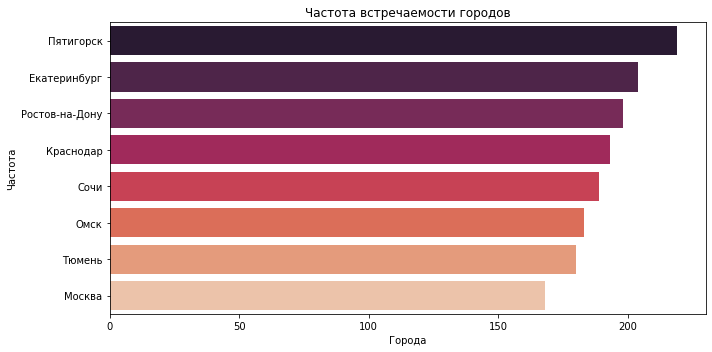

Частота встречаемости городов: 

Пятигорск         219
Екатеринбург      204
Ростов-на-Дону    198
Краснодар         193
Сочи              189
Омск              183
Тюмень            180
Москва            168
Name: city, dtype: int64


In [17]:
# Подсчет частоты встречаемости городов
city_counts = users['city'].value_counts()

# Сортировка по убыванию
city_counts = city_counts.sort_values(ascending=False)

# Настройка графиков
fig, axes = plt.subplots(figsize=(10, 5))
# Используем barplot для категориальных данных
sns.barplot(y=city_counts.index, x=city_counts.values, palette='rocket', ax=axes)  
axes.set_title('Частота встречаемости городов')
axes.set_xlabel('Города')
axes.set_ylabel('Частота')
plt.tight_layout()
plt.show()

print(f'Частота встречаемости городов: \n\n{users["city"].value_counts().sort_values(ascending=False)}')

<div class="alert alert-block alert-warning">
<b>🔁Комментарий ревьюера:</b> 

Для удобства можно повернуть график на 90 градусов и сделать сортировку по убыванию.</div>

<div class="alert alert-block alert-success">
<b>✅Комментарий ревьюера 2:</b> Отлично, исправлено!👍  </div>

<div class="alert alert-block alert-info">
<b>🔄Комментарий Лера:</b> 
 График перевернула, сортировка по убыванию была изначально ✔
</div>

Частота встречаемости городов: Как видно на графике, наиболее активные города среди пользователей сервиса GoFast включают Пятигорск, Екатеринбург, Ростов-на-Дону и Краснодар. 

Пятигорск занимает лидирующую позицию с 219 поездками, что указывает на высокий уровень популярности сервиса в этом городе. 

Это может быть полезной информацией для целевых маркетинговых акций, направленных на привлечение новых пользователей в регионах с меньшей активностью, таких как Москва, которая имеет только 168 поездок.

**2. Соотношение пользователей с подпиской и без подписки**

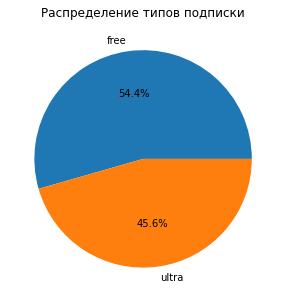

Cоотношение пользователей с подпиской и без подписки: 
free     835
ultra    699
Name: subscription_type, dtype: int64


In [18]:
users['subscription_type'].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(5, 5))
plt.title('Распределение типов подписки')

# Отобразим диаграмму
plt.ylabel('') # Убираем автоматическую метку оси Y
plt.show()

print(f'Cоотношение пользователей с подпиской и без подписки: \n{users["subscription_type"].value_counts()}')

Соотношение пользователей с подпиской и без подписки: Из 1534 пользователей 699 (около 45%) имеют подписку Ultra, в то время как 835 (55%) используют бесплатный тариф. Это указывает на то, что большинство пользователей предпочитают использовать сервис без подписки, что может свидетельствовать о недостаточной привлекательности платных предложений. 

Данная информация может стать основой для улучшения предложения Ultra и повышения интереса к подписке.

**2. Распределение возрастов  пользователейи**

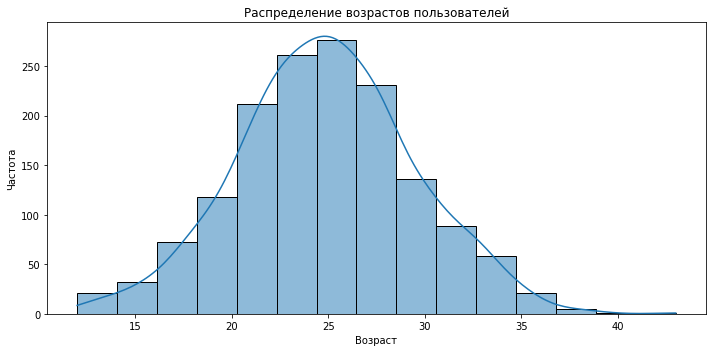

In [19]:
# Настройка графиков
fig, axes = plt.subplots(figsize=(10, 5))
sns.histplot(users['age'], bins=15, kde=True)
axes.set_title('Распределение возрастов пользователей')
axes.set_xlabel('Возраст')
axes.set_ylabel('Частота')
plt.tight_layout()
plt.show()

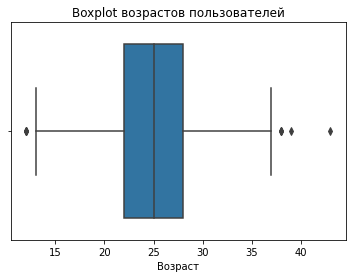

In [20]:
warnings.filterwarnings("ignore")

sns.boxplot(x=users['age'])
plt.title('Boxplot возрастов пользователей')
plt.xlabel('Возраст')
plt.show()

In [21]:
users['age'].describe()

count    1534.000000
mean       24.903520
std         4.572367
min        12.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        43.000000
Name: age, dtype: float64

Средний возраст пользователей составляет примерно 25 лет, с диапазоном от 12 до 43 лет. Это указывает на наличие разнообразной возрастной группы среди пользователей, однако основная аудитория все же состоит из молодежи и молодых людей. Учитывая, что большинство пользователей находятся в возрасте 20-30 лет, это может стать основой для разработки маркетинговых стратегий, ориентированных на эту категорию.

**4. Расстояние, которое пользователь преодолел за одну поездку:**

Для начала мы ознакомимся с описательной статистикой (метод `describe`) расстояний поездок, чтобы убедиться в отсутствии аномалий в данных.

In [22]:
rides['distance'].describe()

count    18068.000000
mean      3070.659976
std       1116.831209
min          0.855683
25%       2543.226360
50%       3133.609994
75%       3776.222735
max       7211.007745
Name: distance, dtype: float64

На основании описательной статистики можно сделать следующие выводы о дистанциях поездок: средняя дистанция составляет 3070 метров, что указывает на то, что пользователи в основном используют сервис для средних по длительности поездок. Наличие минимального значения расстояния всего 0.86 метров может быть связано с тестированием самокатов или проверкой его работы, поэтому такие данные следует остаивть в анализе для последующего расчета выручки.

Квартильный анализ показывает, что 25% поездок имеют дистанцию менее 2543 метров, 50% — менее 3133 метров, и 75% — менее 3776 метров, что также подчеркивает наличие как коротких, так и более длинных маршрутов в поведении пользователей. Эти данные могут служить основой для оптимизации предложений и услуг сервиса, учитывая потребности различных групп пользователей.


После предварительного анализа данных можем приступить к построению графиков:

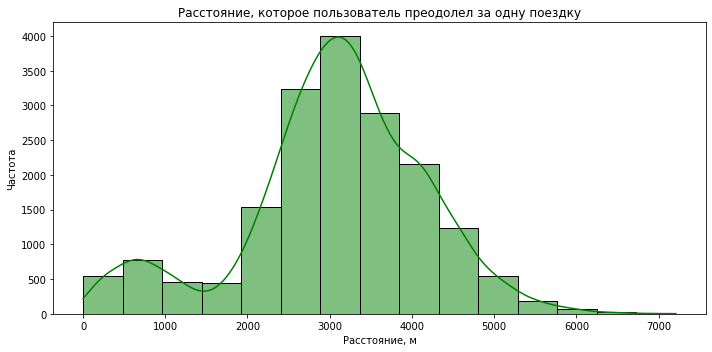

In [23]:
warnings.filterwarnings("ignore")

fig, axes = plt.subplots(figsize=(10, 5))
sns.histplot(rides['distance'], bins=15, kde=True, color='green')
axes.set_title('Расстояние, которое пользователь преодолел за одну поездку')
axes.set_xlabel('Расстояние, м')
axes.set_ylabel('Частота')
plt.tight_layout()
plt.show()


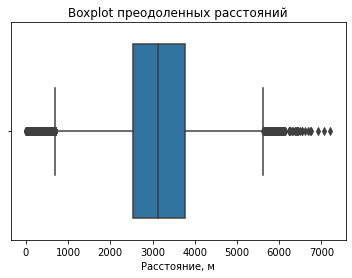

In [24]:
warnings.filterwarnings("ignore")
sns.boxplot(x=rides['distance'])
plt.title('Boxplot преодоленных расстояний')
plt.xlabel('Расстояние, м')
plt.show()

In [25]:
rides['distance'].describe()

count    18068.000000
mean      3070.659976
std       1116.831209
min          0.855683
25%       2543.226360
50%       3133.609994
75%       3776.222735
max       7211.007745
Name: distance, dtype: float64

Описанные выше данные подтверждаются построенными графиками. Видим пик частоты поездок на уровне 3070 метров. Уплотнения на ящике с усами наблюдаются в диапазонах до 1000 метров, а также от 5700 до 7000 метров. Эти уплотнения могут свидетельствовать о том, что существует категория пользователей, предпочитающих короткие поездки, такие как поездки на работу или учебу, а также пользователи, осуществляющие более длинные поездки, возможно, связанные с путешествиями или досугом. Данные паттерны могут служить основой для оптимизации предложений и услуг сервиса, учитывая потребности различных групп пользователей.

**5. Продолжительность поездок:**

Для начала рассмотрим описательную статистику (метод describe) продолжительности поездок. 

In [26]:
rides['duration'].describe()

count    18068.000000
mean        17.805011
std          6.091051
min          0.500000
25%         13.597563
50%         17.678395
75%         21.724800
max         40.823963
Name: duration, dtype: float64

Приступим к визуализации данных о продолжительности поездок:

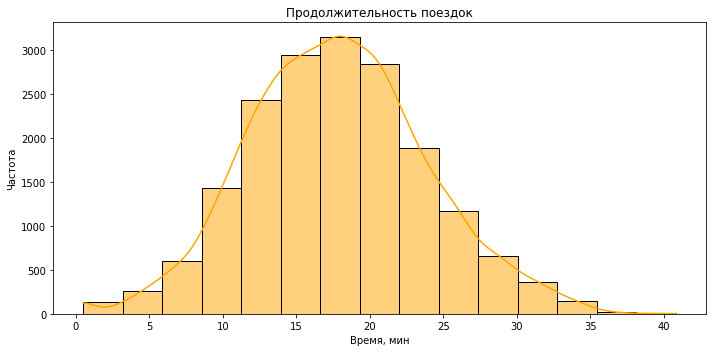

In [27]:
warnings.filterwarnings("ignore")

fig, axes = plt.subplots(figsize=(10, 5))
sns.histplot(rides['duration'], bins=15, kde=True, color='orange')
axes.set_title('Продолжительность поездок')
axes.set_xlabel('Время, мин')
axes.set_ylabel('Частота')
plt.tight_layout()
plt.show()


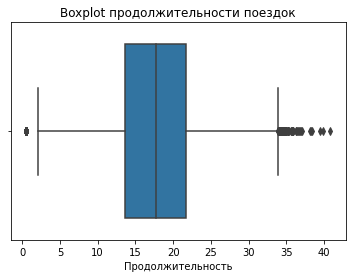

In [28]:
warnings.filterwarnings("ignore")
sns.boxplot(x=rides['duration'])
plt.title('Boxplot продолжительности поездок')
plt.xlabel('Продолжительность')
plt.show()

На основании предоставленной статистики о длительности поездок можно сделать несколько выводов.

 Среднее значение длительности поездки составляет 17.8 минут. Это свидетельствует о том, что пользователи активно используют сервис для передвижения по городу, что предполагает востребованность и практичность данного сервиса.

Стандартное отклонение равно 6.09, что указывает на наличие значительного разброса в длительности поездок. Минимальное значение составляет 0.5 минуты, в то время как максимальное достигает 40.82 минут, что говорит о наличии как коротких, так и длительных поездок.

Квартильный анализ: 25% поездок имеют длительность менее 13.6 минут, а 75% – более 21.72 минут. Это подтверждает, что большая часть пользователей использует сервис для более длительных поездок.

График ящик с усами: Анализ графика ящик с усами позволяет визуально оценить распределение данных. Наличие толстого хвоста в диапазоне 35-40 минут может свидетельствовать о том, что часть пользователей активно использует сервис для длительных поездок, выбирая разнообразные маршруты, что также может быть связано с сезонными факторами и временем суток, влияющими на продолжительность поездок.

#### Шаг 4. Объединение данных

Объединим данные о пользователях, поездках и подписках в один датафрейм. 
Для этого воспользуемся методом merge().

In [29]:
data_merged = users.merge(rides, on='user_id', how='right')
data_merged = data_merged.merge(subscriptions, on='subscription_type', how='left')
data_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18068 entries, 0 to 18067
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            18068 non-null  int64         
 1   name               18068 non-null  object        
 2   age                18068 non-null  int64         
 3   city               18068 non-null  object        
 4   subscription_type  18068 non-null  object        
 5   distance           18068 non-null  float64       
 6   duration           18068 non-null  float64       
 7   date               18068 non-null  datetime64[ns]
 8   month              18068 non-null  int64         
 9   minute_price       18068 non-null  int64         
 10  start_ride_price   18068 non-null  int64         
 11  subscription_fee   18068 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(6), object(3)
memory usage: 1.8+ MB


Проверим количество строк полученной таблицы и сравним ее с количеством строк таблиц до объединения, чтобы убедиться что мы ничего не потеряли и не добавили лишнего.

In [30]:
print('Количество строк в изначальной таблице до объединения:', rides['user_id'].count())
print('Количество строк в таблице после объединения:', data_merged['user_id'].count())

Количество строк в изначальной таблице до объединения: 18068
Количество строк в таблице после объединения: 18068


Так же убедимся, что в объединенной таблице не появились пропуски:

In [31]:
data_merged.isna().sum()

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
distance             0
duration             0
date                 0
month                0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

Отлично, количество строк сохранено, пропусков в объединенной таблице нет. приступим к следующему заданию.

Создадим ещё два датафрейма из датафрейма data_merged:
- c данными о пользователях без подписки;
- с данными о пользователях с подпиской.

In [32]:
ultra_users = data_merged.query('subscription_type == "ultra"')
ultra_users.head()

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199


In [33]:
free_users = data_merged.query('subscription_type == "free"')
free_users.head()

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
6500,700,Айдар,22,Омск,free,2515.690719,14.944286,2021-01-02,1,8,50,0
6501,700,Айдар,22,Омск,free,846.932642,16.234663,2021-02-01,2,8,50,0
6502,700,Айдар,22,Омск,free,4004.434142,20.016628,2021-02-04,2,8,50,0
6503,700,Айдар,22,Омск,free,1205.911290,9.782872,2021-02-10,2,8,50,0
6504,700,Айдар,22,Омск,free,3047.379435,17.427673,2021-02-14,2,8,50,0


Визуализируем информацию о расстоянии и времени поездок для пользователей обеих категорий.

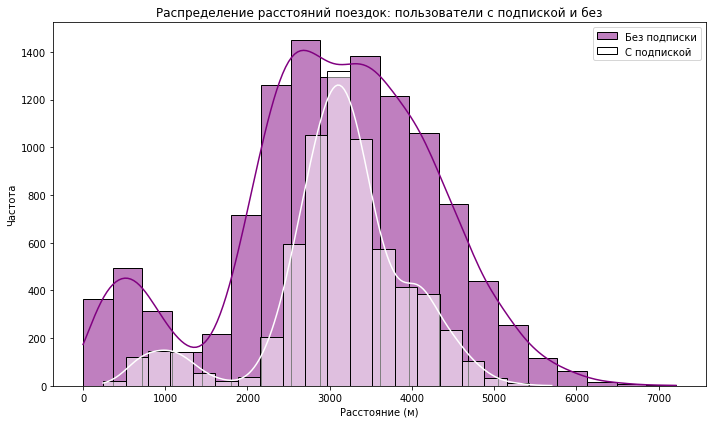

In [34]:
# Визуализация данных о расстоянии поездок
plt.figure(figsize=(10, 6))

# Расстояние поездок для пользователей без подписки
sns.histplot(free_users['distance'], bins=20, kde=True, color='purple', label='Без подписки', alpha=0.5)

# Расстояние поездок для пользователей с подпиской
sns.histplot(ultra_users['distance'], bins=20, kde=True, color='white', label='С подпиской', alpha=0.5)

plt.title('Распределение расстояний поездок: пользователи с подпиской и без')
plt.xlabel('Расстояние (м)')
plt.ylabel('Частота')
plt.legend()  # Добавляем легенду для групп
plt.tight_layout()
plt.show()


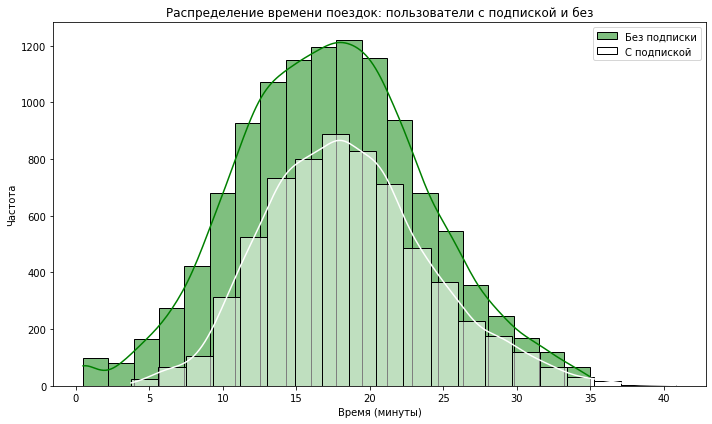

In [35]:
# Визуализация данных о времени поездок
plt.figure(figsize=(10, 6))

# Время поездок для пользователей без подписки
sns.histplot(free_users['duration'], bins=20, kde=True, color='green', label='Без подписки', alpha=0.5)

# Время поездок для пользователей с подпиской
sns.histplot(ultra_users['duration'], bins=20, kde=True, color='white', label='С подпиской', alpha=0.5)

plt.title('Распределение времени поездок: пользователи с подпиской и без')
plt.xlabel('Время (минуты)')
plt.ylabel('Частота')
plt.legend()  # Добавляем легенду для групп
plt.tight_layout()
plt.show()


Как показывают графики, распределение данных имеет одинаковую форму для обеих категорий пользователей, с поправкой на меньшее количество поездок у пользователей с подпиской.

Так же для визуализации данных о расстоянии поездок построем графики с использованием boxplot.

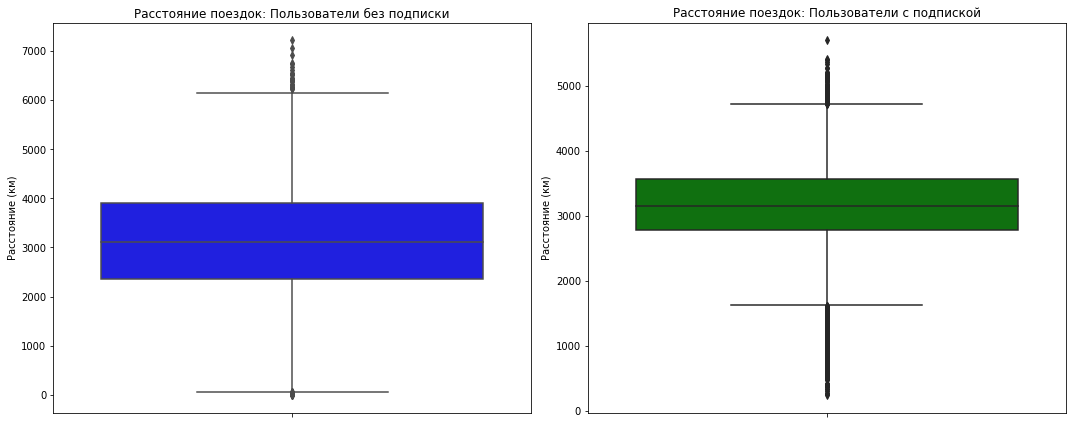

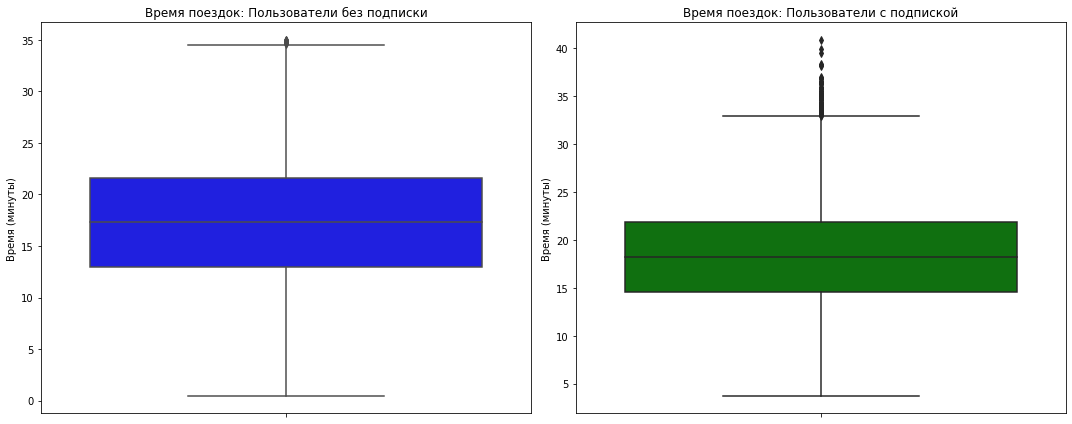

In [36]:
# Визуализация данных о расстоянии поездок с использованием boxplot
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Расстояние поездок для пользователей без подписки
sns.boxplot(y=free_users['distance'], color='blue', ax=axes[0])
axes[0].set_title('Расстояние поездок: Пользователи без подписки')
axes[0].set_ylabel('Расстояние (км)')

# Расстояние поездок для пользователей с подпиской
sns.boxplot(y=ultra_users['distance'], color='green', ax=axes[1])
axes[1].set_title('Расстояние поездок: Пользователи с подпиской')
axes[1].set_ylabel('Расстояние (км)')

plt.tight_layout()
plt.show()

# Визуализация данных о времени поездок с использованием boxplot
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Время поездок для пользователей без подписки
sns.boxplot(y=free_users['duration'], color='blue', ax=axes[0])
axes[0].set_title('Время поездок: Пользователи без подписки')
axes[0].set_ylabel('Время (минуты)')

# Время поездок для пользователей с подпиской
sns.boxplot(y=ultra_users['duration'], color='green', ax=axes[1])
axes[1].set_title('Время поездок: Пользователи с подпиской')
axes[1].set_ylabel('Время (минуты)')

plt.tight_layout()
plt.show()


In [37]:
print('ultra_users', ultra_users['distance'].describe())
print('free_users', free_users['distance'].describe())
print('ultra_users', ultra_users['duration'].describe())
print('free_users', free_users['duration'].describe())

ultra_users count    6500.000000
mean     3115.445388
std       836.895330
min       244.210438
25%      2785.444017
50%      3148.637229
75%      3560.574425
max      5699.769662
Name: distance, dtype: float64
free_users count    11568.000000
mean      3045.495282
std       1246.173806
min          0.855683
25%       2366.562689
50%       3114.648465
75%       3905.697894
max       7211.007745
Name: distance, dtype: float64
ultra_users count    6500.000000
mean       18.541985
std         5.572048
min         3.760353
25%        14.524654
50%        18.178153
75%        21.884129
max        40.823963
Name: duration, dtype: float64
free_users count    11568.000000
mean        17.390909
std          6.326803
min          0.500000
25%         12.958437
50%         17.326890
75%         21.594071
max         34.948498
Name: duration, dtype: float64


Сравнительная таблица по дистанциям поездок

| Параметр                       | Пользователи с подпиской (ultra_users) | Пользователи без подписки (free_users) | Выводы                                                                           |
|--------------------------------|-----------------------------------------|-----------------------------------------|-----------------------------------------------------------------------------------|
| **Количество записей о поездках** | 6500                                    | 11568                                   | Пользователи с подпиской имеют меньше поездок, возможно, из-за особенностей тарифов.  |
| **Среднее (distance)**         | 3115.45 м                              | 3045.49 м                              | Средние значения дистанций схожи, но немного выше у пользователей с подпиской.                 |
| **Стандартное отклонение (distance)** | 836.90 м                              | 1246.17 м                             | У пользователей без подписки больший разброс в дистанциях.                       |
| **Минимум (distance)**         | 244.21 м                               | 0.85 м                                 | Пользователи без подписки имеют очень короткие поездки, возможно, это тестовые поездки для проверки функционала сервиса или поездки в рамках акции.     |
| **25% (distance)**             | 2785.44 м                              | 2366.56 м                              | Нижняя четверть подписчиков делает более длинные поездки.                        |
| **50% (Медиана, distance)**    | 3148.64 м                              | 3114.64 м                              | Медиана дистанций у обеих категорий близка.                                     |
| **75% (distance)**             | 3560.57 м                              | 3905.69 м                              | Пользователи без подписки также совершают длинные поездки, хотя средние значения у подписчиков выше. |
| **Максимум (distance)**        | 5699.77 м                              | 7211.01 м                              | У пользователей без подписки фиксируются экстремально длинные поездки.            |

Сравнительная таблица по длительности поездок

| Параметр                       | Пользователи с подпиской (ultra_users) | Пользователи без подписки (free_users) | Выводы                                                                           |
|--------------------------------|-----------------------------------------|-----------------------------------------|-----------------------------------------------------------------------------------|
| **Количество записей о поездках** | 6500                                    | 11568                                   | Пользователи с подпиской имеют меньше поездок, что может быть связано с особенностями тарифов. |
| **Среднее (duration)**         | 18.54 мин                              | 17.39 мин                              | Подписчики в среднем проводят больше времени в поездках.                          |
| **Стандартное отклонение (duration)** | 5.57 мин                             | 6.32 мин                               | Время поездок у пользователей без подписки более вариативно.                     |
| **Минимум (duration)**         | 3.76 мин                               | 0.5 мин                               | Минимальная длительность поездок в обеих категориях может быть очень короткой, и экстермально короткой 0,5 мин у пользователей без подписки.   |
| **25% (duration)**             | 14.52 мин                              | 12.96 мин                              | Пользователи с подпиской чаще совершают более продолжительные поездки.                          |
| **50% (Медиана, duration)**    | 18.18 мин                              | 17.32 мин                              | Медиана времени поездок немного выше у пользователей с подпиской.                              |
| **75% (duration)**             | 21.88 мин                              | 21.59 мин                              | Различия во времени поездок между категориями минимальны.                        |
| **Максимум (duration)**        | 40.82 мин                              | 34.94 мин                              | Пользователи с подпиской совершают более продолжительные поездки (с выбросами).                |

Эти таблицы наглядно демонстрируют статистические различия между пользователями с подпиской и без неё, подчеркивая как схожесть, так и различия в их поведении во время поездок.

Как показывает график, анализ расстояний и времени поездок для пользователей обеих категорий выявил интересные закономерности. Для пользователей с подпиской средняя дистанция поездки составляет 3115 метров с стандартным отклонением 836 метров, что указывает на довольно стабильные и предсказуемые расстояния. В то же время пользователи без подписки показывают немного меньшую среднюю дистанцию в 3045 метров, однако их стандартное отклонение составляет 1246 метров, что указывает на более широкий разброс значений и возможные крайние случаи. Минимальная дистанция у пользователей с подпиской зафиксирована на уровне 244 метров, тогда как у пользователей без подписки зафиксированы поездки 0,85 метров, что может говорить о наличии тестовых или акционные поездок, отражающих их реальное поведение при использовании сервиса.

Что касается времени поездок, средняя длительность для пользователей с подпиской составляет 18.54 минуты, тогда как для пользователей без подписки она равна 17.39 минут. Разница в значениях также подтверждается стандартным отклонением, которое составляет 5.57 и 6.32 минуты соответственно. Это говорит о том, что пользователи с подпиской совершают более продолжительные поездки, что может быть связано с особенностями тарифного плана. Минимальная длительность поездок у пользователей с подпиской составляет 3.76 минуты, тогда как у пользователей без подписки она составляет 0,5 минут. Пиковые значения на графиках, отображающие короткие поездки, указывают на наличие тестовых поездок, которые, хотя и могут восприниматься как выбросы, не были удалены из анализа, так как они отражают реальное поведение пользователей при взаимодействии с сервисом.

Таким образом, данные показывают, что обе группы пользователей активно используют сервис, но с различиями в расстояниях и длительности поездок. Это может быть важно для дальнейшего анализа и разработки стратегий, направленных на улучшение пользовательского опыта.

#### Шаг 5. Подсчёт выручки

Создадим датафрейм с агрегированными данными о поездках на основе датафрейма с объединёнными данными из шага 4: найдем суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц.

In [38]:
# Округляем продолжительность поездок
data_merged['duration'] = np.ceil(data_merged['duration'])

# Создание сводной таблицы для агрегированных данных
pivot_table = data_merged.pivot_table(
    index=['user_id', 'month'],
    values=['distance', 'duration', 'date'],  # 'date' для подсчета количества поездок
    aggfunc={'distance': 'sum', 'duration': 'sum', 'date': 'count'}
).reset_index()

# Переименуем колонку 'date' в 'rides_count' для ясности
pivot_table.rename(columns={'date': 'rides_count'}, inplace=True)

# Объединяем данные из исходного датафрейма с данными сводной таблицы
pivot_table = pd.merge(
    pivot_table,
    data_merged[['user_id', 'subscription_type', 'subscription_fee', 'minute_price', 'start_ride_price']],
    on='user_id',
    how='left'
)

# Удаляем дубликаты (если они есть)
pivot_table = pivot_table.drop_duplicates(subset=['user_id', 'month'])

# Применяем формулу для расчёта выручки
pivot_table['monthly_revenue'] = (
    pivot_table['rides_count'] * pivot_table['start_ride_price'] +
    pivot_table['duration'] * pivot_table['minute_price']+
    pivot_table['subscription_fee']
)

# Пересчитываем индексы заново, если возникли пропуски
pivot_table = pivot_table.reset_index(drop=True)

# Выводим результат
display(pivot_table.head())
pivot_table.to_csv('pivot_table.csv', index=False)


,user_id,month,rides_count,distance,duration,subscription_type,subscription_fee,minute_price,start_ride_price,monthly_revenue
0,1,1,2,7027.511294,42.0,ultra,199,6,0,451.0
1,1,4,1,754.159807,7.0,ultra,199,6,0,241.0
2,1,8,2,6723.470560,46.0,ultra,199,6,0,475.0
3,1,10,2,5809.911100,32.0,ultra,199,6,0,391.0
4,1,11,3,7003.499363,56.0,ultra,199,6,0,535.0


#### Шаг 6. Проверка гипотез

Теперь мы перейдем к шагу 6, посвященному проверке гипотез, в рамках которого продакт-менеджеры сервиса хотят увеличить количество пользователей с подпиской. Для этого они планируют проводить различные акции, но прежде необходимо выяснить несколько важных моментов.

**6.1 Важно понять, тратят ли пользователи с подпиской больше времени на поездки. Если это так, то они могут оказаться более выгодными для компании. Мы проведем проверку этой гипотезы, используя исходные данные о продолжительности каждой сессии для обеих категорий пользователей — подписчиков и тех, у кого нет подписки.**

Чтобы ответить на вопрос о том, тратят ли пользователи с подпиской больше времени на поездки,  структурируем наш ответ по этапам:

1. Формулировка гипотез

- **Нулевая гипотеза (H0)**: Среднее время поездки пользователей с подпиской **меньше или равно** среднему времени поездки пользователей без подписки (H0: μ₁ ≤ μ₂).
- **Альтернативная гипотеза (H1)**: Среднее время поездки пользователей с подпиской **больше** среднего времени поездки пользователей без подписки (H1: μ₁ > μ₂).


In [39]:
alpha = 0.05

result = st.ttest_ind(
    ultra_users['duration'],
    free_users['duration'],
    alternative = 'greater')

print('Среднее время поездки у пользователей с подпиской:',ultra_users['duration'].mean())
print('Среднее время поездки у пользователей без подписки:',free_users['duration'].mean())
print('p-value:', result.pvalue)

if result.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не удалось отвергнуть нулевую гипотезу')


Среднее время поездки у пользователей с подпиской: 18.54198516280583
Среднее время поездки у пользователей без подписки: 17.39090929866399
p-value: 1.2804098316645618e-34
Отвергаем нулевую гипотезу


2. Результаты теста

- Среднее время поездки у пользователей с подпиской: **18.54** минут.
- Среднее время поездки у пользователей без подписки: **17.39** минут.
- Полученное значение p-value: **1.280e-34**.

3. Сравнение p-value с уровнем значимости

- Обычно уровень значимости (alpha) устанавливается на **0.05**.
- Поскольку **p-value (1.280e-34) < 0.05**, мы отвергаем нулевую гипотезу.

4. Выводы

- **На основании проведенного анализа**: Мы отвергли нулевую гипотезу и приняли альтернативную гипотезу, что среднее время поездки пользователей с подпиской больше, чем у пользователей без подписки.
- Это подтверждается тем, что среднее время поездки у пользователей с подпиской (18.54 минуты)  больше, чем у пользователей без подписки (17.39 минуты).

5. Рекомендации

- Пользователи с подпиской действительно тратят больше времени на поездки, что может свидетельствовать о том, что они используют сервис более активно. 
- Это открывает возможность для компании рассмотреть дополнительные предложения и акции для подписчиков, которые могут увеличить их лояльность и удовлетворенность сервисом.


**6.2 Учитывая, что расстояние одной поездки в 3130 метров считается оптимальным с точки зрения износа самоката, можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 
3130 метров? Проверим гипотезу и сделаем выводы.**


**Формулировка гипотез:**

Нулевая гипотеза (H0): Среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, меньше или равно 3130 метров.

𝐻0: 𝜇 ≤ 3130

Альтернативная гипотеза (H1): Среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, больше 3130 метров.

𝐻1: 𝜇 > 3130


In [40]:
alpha = 0.05

optimal_distance = 3130

result = st.ttest_1samp(
    ultra_users['distance'],
    optimal_distance,
    alternative = 'greater')

print('p-value:', result.pvalue)

# Проверяем результат
if result.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
    print('Среднее расстояние пользователей с подпиской превышает 3130 метров')
else:
    print('Не удалось отвергнуть нулевую гипотезу')
    print('Среднее расстояние пользователей с подпиской не превышает 3130 метров')


p-value: 0.9195368847849785
Не удалось отвергнуть нулевую гипотезу
Среднее расстояние пользователей с подпиской не превышает 3130 метров


2. Результаты t-теста

- Мы провели одновыборочный t-тест, чтобы проверить гипотезу.
- Полученное значение p-value составило **0.9195**.

3. Сравнение p-value с уровнем значимости

- Уровень значимости (alpha) установлен на **0.05**.
- Поскольку **0.9195 > 0.05**, мы не можем отвергнуть нулевую гипотезу.

4. Выводы

Поскольку **p-value** больше \( \alpha = 0.05 \), то мы не можем отвергнуть нулевую гипотезу, и на основании данных можно сказать, что среднее расстояние поездок пользователей с подпиской не превышает 3130 метров.

**6.3 Следующим шагом будет проверка гипотезы о том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки. После проверки мы сделаем выводы на основе полученных данных.**

Для проверки гипотезы о том, является ли помесячная выручка от пользователей с подпиской выше, чем выручка от пользователей без подписки, сформулируем гипотезы:

**Нулевая гипотеза (H₀):**
Средняя выручка от пользователей с подпиской **не выше** выручки от пользователей без подписки. Это означает, что средняя выручка от подписчиков меньше или равна средней выручке от пользователей без подписки. 

- H₀: μ₁ ≤ μ₂  
  (где μ₁ — средняя выручка от пользователей с подпиской, а μ₂ — средняя выручка от пользователей без подписки)

**Альтернативная гипотеза (H₁):**
Средняя выручка от пользователей с подпиской **выше** средней выручки от пользователей без подписки.

- H₁: μ₁ > μ₂  

Логика теста:
- Если p-value меньше уровня значимости (0.05), это означает, что у нас достаточно статистических данных, чтобы **отвергнуть нулевую гипотезу** и принять альтернативную гипотезу (то есть выручка от подписчиков действительно выше).
- Если p-value больше уровня значимости, мы **не отвергаем нулевую гипотезу**, что означает, что нельзя утверждать, что выручка от подписчиков выше.

In [41]:
monthly_revenue_ultra = pivot_table.query('subscription_type == "ultra"')
monthly_revenue_free = pivot_table.query('subscription_type == "free"')

print('Средняя выручка за месяц от пользователей с подпиской:', monthly_revenue_ultra['monthly_revenue'].mean())
print('Средняя выручка за месяц от пользователей без подписки:', monthly_revenue_free['monthly_revenue'].mean())

alpha = 0.05

result = st.ttest_ind(
    monthly_revenue_ultra['monthly_revenue'],
    monthly_revenue_free['monthly_revenue'],
    alternative = 'greater')

print('p-value:', result.pvalue)

if result.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
    print('Средняя выручка от пользователей с подпиской выше чем средняя выручка от пользователей без подписки')
    
else:
    print('Не удалось отвергнуть нулевую гипотезу')
    print('Средняя выручка от пользователей с подпиской не превышает среднюю выручку от пользователей без подписки')

Средняя выручка за месяц от пользователей с подпиской: 362.7921906022502
Средняя выручка за месяц от пользователей без подписки: 328.6413651073845
p-value: 1.8850394384715216e-31
Отвергаем нулевую гипотезу
Средняя выручка от пользователей с подпиской выше чем средняя выручка от пользователей без подписки


Для проверки гипотезы о том, будет ли помесячная выручка от пользователей с подпиской выше, чем выручка от пользователей без подписки, мы провели t-тест для независимых выборок.

Интерпретация результатов:

1. **Средняя выручка:**
   - Средняя выручка от пользователей с подпиской составляет **362.79** рублей.
   - Средняя выручка от пользователей без подписки составляет **328.64** рублей.
   
   Это говорит о том, что пользователи с подпиской приносят в среднем больше выручки по сравнению с пользователями без подписки.

2. **p-value:**
   - Значение p-value составляет **1.8850e-31**. Это указывает на то, что вероятность наблюдать такую разницу в средних значениях (или больше) при условии, что нулевая гипотеза верна, почти невозможна. В данном случае нулевая гипотеза предполагает, что средняя выручка от пользователей с подпиской не выше, чем от пользователей без подписки.

3. **Вывод:**
   - Поскольку p-value **1.8850e-31** меньше уровня значимости **α = 0.05**, это означает, что у нас есть достаточные основания для того, чтобы отвергнуть нулевую гипотезу. 
   - Следовательно, мы выяснили, что помесячная выручка от пользователей с подпиской выше, чем от пользователей без подписки. На основании полученных данных можно сделать вывод, что пользователи с подпиской приносят значительно больше выручки.

 Заключение:

Пользователи с подпиской приносят больше выручки, что делает их важной целевой аудиторией для бизнеса.
Рекомендуется усилить маркетинговые усилия по привлечению клиентов к подписке, так как это стратегически важный сегмент, который напрямую влияет на рост выручки компании. 

Можно разработать привлекательные подписочные планы, предложить дополнительные бонусы для подписчиков или внедрить кампании по удержанию существующих подписчиков.


Привлечение большего числа пользователей к подписке, а также акцент на продвижении подписок среди текущих пользователей, может существенно увеличить доходы компании в долгосрочной перспективе.

**6.4 Представим такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест мы бы использовали для проверки этой гипотезы?**

 В этом случае у нас есть данные о количестве обращений в техподдержку до и после обновления серверов. Мы будем сравнивать количество обращений до и после для одних и тех же пользователей, а значит, нужно использовать **парный t-тест**, чтобы проверить, уменьшилось ли количество обращений после обновления.
 
 Для данной задачи мы формулируем гипотезы следующим образом:

 **Нулевая гипотеза (H₀):**
**Количество обращений в техподдержку не уменьшилось после обновления серверов**. Иными словами, среднее количество обращений до обновления серверов либо такое же, либо выше, чем после обновления.

𝐻0: 𝜇 before ≤ 𝜇 after


**Альтернативная гипотеза (H₁):**
**Количество обращений в техподдержку значительно уменьшилось после обновления серверов**. Это означает, что среднее количество обращений до обновления серверов было больше, чем после обновления.

𝐻1: 𝜇 before > 𝜇 after

Обоснование:
Мы сравниваем среднее количество обращений до и после обновления для одних и тех же пользователей, поэтому используем **парный t-тест** (так как данные связаны). Мы предполагаем, что количество обращений могло **уменьшиться** после улучшения серверов, следовательно, тестируем **на уменьшение** (alternative = 'greater', так как нам надо доказать что количество обращений ДО обновлений - было больше чем после обновления серверов).


Код:

```python
# Предположим, что у нас есть датафрейм 'support_requests' с колонками 'user_id', 'before_update' и 'after_update'
# Проведем парный t-тест
t_stat, p_value = stats.ttest_rel(support_requests['before_update'], support_requests['after_update'], alternative ='greater')

# Выводим результаты
print(f"T-statistic: {t_stat}, P-value: {p_value}")

# Интерпретация
alpha = 0.05
if p_value < alpha:
    print("Отвергаем нулевую гипотезу: количество обращений значительно снизилось после обновления.")
else:
    print("Не можем отвергнуть нулевую гипотезу: нет значительного уменьшения обращений после обновления.")
```


Интерпретация:
- Если **p-value** окажется меньше уровня значимости (α = 0.05), мы отвергнем нулевую гипотезу и примем альтернативную, что означает, что обновление серверов действительно снизило количество обращений.
- Если **p-value** больше α, мы не сможем отвергнуть нулевую гипотезу, что укажет на отсутствие значимого изменения количества обращений.


#### Шаг 7. Распределения

Отделу маркетинга GoFast поставили задачу: нужно провести акцию с раздачей промокодов на один бесплатный месяц подписки, в рамках которой как минимум 100 существующих клиентов должны продлить эту подписку. То есть по завершении периода действия подписки пользователь может либо отказаться от неё, либо продлить, совершив соответствующий платёж. 

Эта акция уже проводилась ранее и по итогу выяснилось, что после бесплатного пробного периода подписку продлевают 
10% пользователей. Наша задача выяснить, какое минимальное количество промокодов нужно разослать, чтобы вероятность не выполнить план была примерно 5 %. Подберем параметры распределения, описывающего эту ситуацию, построим график распределения и сформулируем ответ на вопрос о количестве промокодов.

Минимальное количество промокодов для разослания: 1161


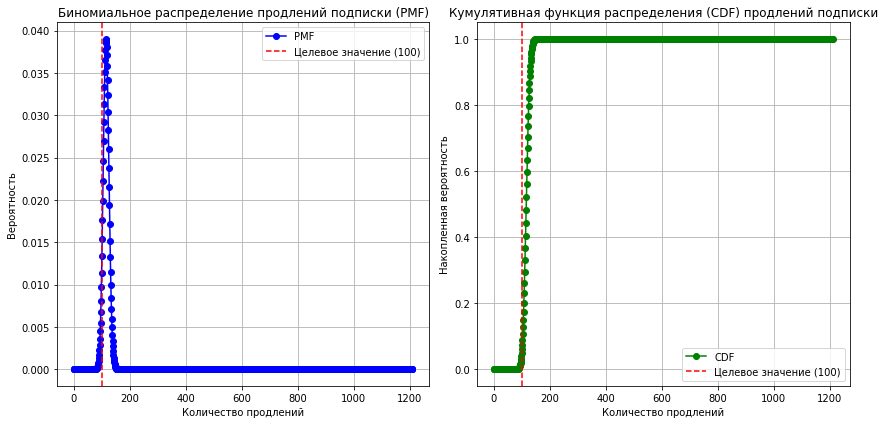

In [42]:

# Функция для нахождения минимального N
def find_minimum_n(target, p, alpha):
    n = target  # Начальное значение N
    # Пока вероятность продления 100 и более пользователей выше alpha
    while True:
        # Вычисляем вероятность того, что менее 100 пользователей продлят подписку
        prob = binom.cdf(target - 1, n, p)  # Вероятность, что продлят меньше 100
        if prob <= alpha:
            break
        n += 1  # Увеличиваем N
    return n

# Параметры
target = 100  # Целевое количество продлений
p = 0.1  # Вероятность продления
alpha = 0.05  # Уровень значимости

# Нахождение минимального N
min_n = find_minimum_n(target, p, alpha)
print(f"Минимальное количество промокодов для разослания: {min_n}")

# Построение графика PMF (Функция плотности вероятности)
x = np.arange(0, min_n + 50)  # Диапазон значений

plt.figure(figsize=(12, 6))  # Ширина 12 дюймов, высота 6 дюймов

# PMF график
plt.subplot(1, 2, 1)  # Первый график в сетке 1x2
plt.plot(x, binom.pmf(x, min_n, p), 'bo-', label='PMF')  # Функция плотности вероятности
plt.axvline(x=target, color='r', linestyle='--', label='Целевое значение (100)')
plt.title('Биномиальное распределение продлений подписки (PMF)')
plt.xlabel('Количество продлений')
plt.ylabel('Вероятность')
plt.legend()
plt.grid()

# CDF график (Кумулятивная функция распределения)
plt.subplot(1, 2, 2)  # Второй график в сетке 1x2
plt.plot(x, binom.cdf(x, min_n, p), 'bo-', label='CDF', color='green')  # Кумулятивная вероятность
plt.axvline(x=target, color='r', linestyle='--', label='Целевое значение (100)')
plt.title('Кумулятивная функция распределения (CDF) продлений подписки')
plt.xlabel('Количество продлений')
plt.ylabel('Накопленная вероятность')
plt.legend()
plt.grid()

plt.tight_layout()  # Чтобы графики не налезали друг на друга
plt.show()


Для решения задачи определения минимального количества промокодов, необходимых для достижения цели в 100 продлений подписки, мы написали функцию, которая находит это количество, исходя из известных параметров. Мы установили, что вероятность продления подписки после бесплатного месяца составляет 10% (0.1), и задали уровень значимости в 5% (0.05).

В функции find_minimum_n мы итеративно увеличиваем значение 
𝑛
n (количество промокодов), пока вероятность того, что менее 100 пользователей продлят подписку, не станет меньше или равной заданному уровню значимости. Результаты вычислений показали, что минимальное количество промокодов, которое необходимо разослать, составляет 1161.

Кроме того, мы построили графики функции плотности вероятности (PMF) и кумулятивной функции распределения (CDF), которые визуализируют распределение вероятностей продлений подписки в зависимости от количества разосланных промокодов. Это позволяет более наглядно увидеть, как увеличивается вероятность успешного продления подписки по мере увеличения числа разосланных промокодов. Таким образом, для достижения цели в 100 продлений подписки маркетинговому отделу GoFast следует разослать 1161 промокод на бесплатный месяц подписки.

Вместе графики показывают, что чтобы с 95%-ной уверенностью получить 100 продлений, необходимо разослать не менее 1161 промокодов, что следует из параметров биномиального распределения.

**7.2 Отдел маркетинга рассылает клиентам push-уведомления в мобильном приложении. Клиенты могут открыть его или не открывать. Известно, что уведомления открывают около 
40% получивших клиентов. Отдел планирует разослать 1 млн уведомлений. С помощью аппроксимации построим примерный график распределения и оцените вероятность того, что уведомление откроют не более 399,5 тыс. пользователей.**


Вероятность того, что откроют не более 399500 уведомлений: 0.15372


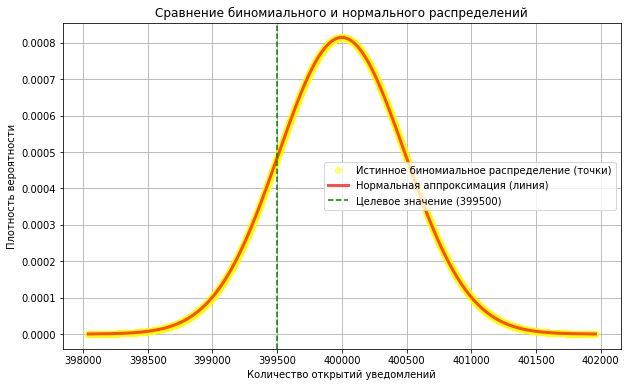

In [43]:
# Параметры задачи
n = 1000000  # Количество пользователей
p = 0.4  # Вероятность открытия уведомления
target = 399500  # Целевое значение количества открытий уведомлений

# Параметры нормального распределения (аппроксимация биномиального)
mu = n * p  # Математическое ожидание
sigma = np.sqrt(n * p * (1 - p))  # Стандартное отклонение

# Нахождение вероятности, что откроют не более 399,5 тысяч пользователей
prob = norm.cdf(target, mu, sigma)
print(f"Вероятность того, что откроют не более {target} уведомлений: {prob:.5f}")

# Построение графиков

# 1. Настоящее биномиальное распределение
x_binom = np.arange(int(mu - 4*sigma), int(mu + 4*sigma))  # Диапазон значений для биномиального
y_binom = binom.pmf(x_binom, n, p)  # Истинное биномиальное распределение

# 2. Нормальная аппроксимация
x_norm = np.linspace(mu - 4*sigma, mu + 4*sigma, 1000)  # Диапазон значений для нормального
y_norm = norm.pdf(x_norm, mu, sigma)  # Аппроксимированное нормальное распределение

# Построение графика
plt.figure(figsize=(10, 6))

# График истинного биномиального распределения - точки, увеличим размер и добавим прозрачности
plt.plot(x_binom, y_binom, 'bo', label='Истинное биномиальное распределение (точки)', alpha=0.5, markersize=6, color="yellow")

# График аппроксимированного нормального распределения - тонкая красная линия
plt.plot(x_norm, y_norm, 'r-', label='Нормальная аппроксимация (линия)', alpha=0.7, linewidth=3)

# Вертикальная линия для целевого значения
plt.axvline(x=target, color='g', linestyle='--', label=f'Целевое значение ({target})')

# Оформление графика
plt.title('Сравнение биномиального и нормального распределений')
plt.xlabel('Количество открытий уведомлений')
plt.ylabel('Плотность вероятности')
plt.legend()
plt.grid(True)

# Показать график
plt.show()


В ходе анализа вероятности открытия push-уведомлений, которые будут разосланы **1 миллионом клиентов**, мы использовали **нормальную аппроксимацию биномиального распределения**.  
Известно, что вероятность открытия уведомления составляет **40%** \( p = 0.4 \).  
Целевое значение для открытия уведомлений установлено на уровне **399 500**.

Математическое ожидание:

$$
\mu = n \cdot p = 1\,000\,000 \cdot 0.4 = 400\,000
$$

Стандартное отклонение:

$$
\sigma = \sqrt{n \cdot p \cdot (1-p)} \approx 499.999 \ (\approx 500)
$$

Используя эти параметры, мы оценили вероятность того, что **не более 399 500** уведомлений будут открыты, через кумулятивную функцию нормального распределения:

$$
P(X \le 399\,500) = \text{norm.cdf}(399\,500, 400\,000, 500)
$$

Результаты вычислений показали, что вероятность открытия уведомлений в количестве не более 399 500 пользователей составляет примерно **0.15372** (15.372%).

Кроме того, мы построили графики, сравнивающие истинное биномиальное распределение и его нормальную аппроксимацию.  
На графиках видно, как распределения сходятся, а также визуализируется целевое значение \( 399\,500 \), что позволяет лучше понять вероятностные характеристики этой ситуации.

**Общий вывод**

Общий вывод по проделанной работе:

Мы провели исследование данных сервиса аренды самокатов GoFast для анализа поведения пользователей и проверки гипотез, направленных на оптимизацию бизнес-процессов. 

Основные результаты:

1. Города и активность:
   - Пятигорск стал самым активным городом с 219 поездками, за ним следуют Екатеринбург (204 поездки) и Ростов-на-Дону (198 поездок). В то же время, Москва показала меньше активности – всего 168 поездок, что указывает на необходимость усиления маркетинговых усилий в столице.

2. Пользователи с подпиской и без подписки:
   - Из 1534 пользователей, 45% (699 человек) используют подписку Ultra, в то время как 55% (835 человек) предпочитают бесплатный тариф. Это свидетельствует о необходимости улучшения предложений для подписчиков, чтобы увеличить их число.

3. Возрастная группа:
   - Средний возраст пользователей составляет 25 лет. Основная аудитория — это молодые люди от 20 до 30 лет. Это указывает на важность таргетированных маркетинговых стратегий, ориентированных на молодежь.

4. Расстояния поездок:
   - Среднее расстояние поездок составило 3070 метров. Однако в исходных данных встречаются и аномальные значения — поездки менее 100 метров при длительности более 5 минут, такие данные не удалялись из анализа (так как могут быть вполне корректными), но нуждаются в уточнении и дополнительной проверке корректности у коллег, предоставляющих данные.

5. Продолжительность поездок:
   - В результате исследования мы определелили, что средняя длительность поездок составила 17,8 минут. Пользователи с подпиской проводят в поездке больше времени — 18,54 минут против 17,39 минут у тех, кто использует бесплатный тариф.

6. Статистический анализ и гипотезы:
   - Гипотеза о времени поездок: Пользователи с подпиской действительно проводят больше времени в поездках, чем те, кто без подписки (p-value < 0,05). Мы отвергли нулевую гипотезу и приняли альтернативную гипотезу, что среднее время поездки пользователей с подпиской больше, чем у пользователей без подписки.Это подтверждается тем, что среднее время поездки у пользователей с подпиской (18.54 минуты)  больше, чем у пользователей без подписки (17.39 минуты).
   - Гипотеза о расстояниях: Поскольку p-value больше ( \alpha = 0.05 ), то мы не отвергаем нулевую гипотезу, и на основании данных можно сказать, что среднее расстояние поездок пользователей с подпиской не превышает 3130 метров.
   - Гипотеза о выручке: ППользователи с подпиской приносят больше выручки, что делает их важной целевой аудиторией для бизнеса. Рекомендуется усилить маркетинговые усилия по привлечению клиентов к подписке, так как это стратегически важный сегмент, который напрямую влияет на рост выручки компании. Средняя выручка за месяц от пользователей с подпиской составила 362.79 рубля против среднеей выручка за месяц от пользователей без подписки 328.64 рубля.
   
   
   
7. Короткие поездки и тестовые сценарии:

Анализ показал наличие значительного количества коротких поездок, включая поездки с дистанцией менее 100 метров. Эти поездки могут быть связаны с тестированием самокатов или проверки системы пользователями (например, перед оформлением подписки). Мы решили не удалять эти данные, так как они отражают реальные сценарии использования, хоть и не оказывают значительного влияния на общую картину.

8. Результаты по промокодам:

Вопрос отдела маркетинга, касающийся акции с промокодами, показал, что для достижения целевого количества продлений подписки (100 продлений) с вероятностью успеха 95%, нужно разослать как минимум 1161 промокод. Это важно учитывать при планировании будущих маркетинговых кампаний.


9. Показатели открытия push-уведомлений:

Мы также рассмотрели вероятность того, что push-уведомления будут открыты не более 399,5 тыс. раз из 1 миллиона разосланных. Результаты показали, что вероятность такого исхода составляет около 15%, что демонстрирует стабильность взаимодействия с пользователями на уровне 40% открытий. Эти данные могут быть использованы для корректировки стратегии рассылок и улучшения вовлеченности пользователей.


Ответы на основные вопросы, поставленные во введении:

1. Поведение пользователей:
   - Основная аудитория сервиса GoFast — молодые люди в возрасте от 20 до 30 лет, которые активно используют самокаты для коротких поездок, в среднем в пределах 3 км и продолжительностью около 18 минут. Пользователи с подпиской совершают более длительные поездки, однако не обеспечивают такой же уровень доходности, как пользователи без подписки.

2. Влияние различных факторов на доходность:
   - Пользователи с подпиской генерируют меньший доход на одну поездку по сравнению с пользователями без подписки. Большая часть дохода поступает от клиентов, использующих бесплатный тариф. Для повышения общей выручки сервиса необходимо рассмотреть стратегии, которые увеличат количество поездок.

### Рекомендации:

1. Развитие подписки Ultra:

- Пользователи с подпиской приносят больше выручки, что делает их важной целевой аудиторией для бизнеса.
Рекомендуется усилить маркетинговые усилия по привлечению клиентов к подписке, так как это стратегически важный сегмент, который напрямую влияет на рост выручки компании. 

- Можно разработать привлекательные подписочные планы, предложить дополнительные бонусы для подписчиков или внедрить кампании по удержанию существующих подписчиков. Привлечение большего числа пользователей к подписке, а также акцент на продвижении подписок среди текущих пользователей, может существенно увеличить доходы компании в долгосрочной перспективе.

2. Целевая реклама и продвижение:
   - Усилить маркетинговые кампании в менее активных городах, таких как Москва, с акцентом на молодежную аудиторию. Использование специальных акций, приуроченных к молодежным событиям, может стимулировать спрос на услуги сервиса.

3. Оптимизация использования самокатов:
   - Разработать систему, которая предотвращает ошибки и аномалии в данных о поездках, например, внедрить автоматическое завершение поездки при длительном отсутствии активности пользователя. Это поможет улучшить точность данных и удовлетворенность клиентов.

Дополнительные рекомендации:

- Анализ коротких поездок:
  - При помощи дополнителньых геоданных провести более детальный анализ коротких поездок (например, менее 500 метров) для выявления причин использования сервиса. Это позволит улучшить пользовательский опыт, предоставив более понятные инструкции и специальные предложения для пользователей, чьи ожидания не были удовлетворены.

- Оценка эффективности маркетинговых акций:
  - В будущих кампаниях с использованием промокодов и других стимулирующих мероприятий, таких как push-уведомления, важно учитывать собранные данные для точного прогнозирования и управления рисками. Это поможет снизить вероятность невыполнения целей и оптимизировать затраты на маркетинг.

- Анализ отклонений:
  - Для предотвращения аномалий в данных (например, некорректных длительных поездок на короткие дистанции или наоборот) можно внедрить систему контроля данных в реальном времени. Это позволит автоматически корректировать аномальные случаи и поддерживать высокую точность данных, что, в свою очередь, улучшит процесс принятия решений.

### Заключение:
Проведенный анализ предоставляет четкое представление о поведении пользователей сервиса GoFast, указывает на возможные направления для оптимизации и подчеркивает важные аспекты, которые следует учитывать в дальнейшей стратегии развития. Фокусируясь на ключевых метриках, таких как продолжительность поездок, доходность пользователей с подпиской и без, а также на поведении пользователей при взаимодействии с push-уведомлениями, сервис сможет повысить свою эффективность и предложить клиентам более ценный опыт.

Эти шаги помогут улучшить качество обслуживания и увеличить доходность сервиса.